In [13]:
import pandas as pd

df = pd.read_csv("obser2021.csv", sep=";")

df2 = df[df['anyy'] > 2016]
print(df2)
df2 = df2[['anyy', 'mes', 'plujamm']]
print(df2)
print(df2.groupby(['anyy']).sum())

      anyy  mes  plujamm
40    2018    8        9
110   2018   10        9
150   2017    7        8
177   2017   10        3
226   2018   11        6
...    ...  ...      ...
4691  2018    2        9
4788  2018    2        5
4798  2018    5       10
4920  2018    8        4
4938  2017   11        1

[138 rows x 3 columns]
      mes  plujamm
anyy              
2017  519      358
2018  390      344


In [32]:
# a.Localiza el observatorio con la temperatura máxima

df3 = df.groupby(['anyy']).mean()
df3.sort_values(by=['anyy'], ascending=False)[0:5]

df4 = df[df['anyy']>2013]
max = df4['tmax'].max()
df4.loc[df4['tmax'] == max]


      anyy  mes  dia    obser  ventkh component  plujamm   tmax   tmin  \
13    2015    9    5  TARRACO      36        SO        0  32.02   3.89   
40    2018    8    6   STACOL     185        SE        9  38.81  17.64   
44    2015    8   12   LLEIDA      56         S        9  42.55  16.68   
76    2014   11   10   LLEIDA     157        SO        1  30.98  -5.63   
101   2015    4   23   MASNOU     194        SO        8  30.75  10.41   
...    ...  ...  ...      ...     ...       ...      ...    ...    ...   
4920  2018    8   24    BERGA     147         S        4  41.90   7.05   
4932  2014    2    7    HOSPI     107        NO        0  30.41   1.68   
4938  2017   11    8   STACOL     113        NO        1  40.15  -6.47   
4980  2015   11   23   LLEIDA     113        NO        5  39.88  15.92   
4996  2015    6   20   LLEIDA     199        NE        3  17.22  -5.55   

      tmitjana  
13       14.07  
40       10.59  
44       12.93  
76       18.30  
101      10.17  
...      

In [34]:
# b.Localiza el observatorio con la temperatura mínima en Febrero

df5 = df4[df4['mes'] == 2]
min = df5['tmin'].min()
df5.loc[df5['tmin'] == min]

anyy  mes  dia    obser  ventkh component  plujamm   tmax  tmin  \
2735  2017    2   26  TARRACO      89        SO        4  14.97 -9.23   

      tmitjana  
2735      12.1

In [41]:
# c.Observatorio, día mes y año con el viento más fuerte
vent_max = df['ventkh'].max()
df.loc[df['ventkh'] == vent_max].iloc [:,[3,2,1,0,4]]

obser  dia  mes  anyy  ventkh
6       GIRONA   16    3  1970     200
156     GIRONA   17   11  1996     200
463     MASNOU   24    1  1992     200
510      HOSPI    1    1  2011     200
542   TIBIDABO    3    4  2009     200
643     MASNOU   26    1  1996     200
700        BCN   22    2  1984     200
841   TIBIDABO   20   12  1987     200
877        VIC    3    8  2007     200
1266    LLEIDA    5    5  2014     200
1374    GIRONA    5    2  1959     200
1426    GIRONA   26    9  1951     200
1898     BERGA    5    3  1989     200
1934    STACOL   28    9  2006     200
2406     BERGA   26    8  2014     200
2478    GIRONA   30    3  2004     200
2672    MASNOU   15    4  2011     200
2782     BERGA    9    4  1969     200
2909     BERGA    3   10  1984     200
3350   TARRACO   20    1  2000     200
3457    GIRONA   11    5  1992     200
3660       BCN   29   11  1985     200
3731    GIRONA    6    8  1962     200
3920    STACOL   25    7  1987     200
3951    MASNOU    8   10  1951     200
3998       BCN   16   11  1958     200
4094    LLEIDA   21   12  1988     200
4557    GIRONA   10   10  1991     200
4763       BCN   19   12  1950     200
4793    MASNOU   17    8  1978     200

In [42]:
# Ejercicio 4: Queremos saber las temperaturas máximas de cada mes en los distintos observatorios y en los distintos años.
# •Cómo presentarías los datos ?

df4a = df.groupby(['obser','anyy', 'mes']).agg({'tmax': ['max']})
df4a


tmax
                  max
obser anyy mes       
BCN   1950 2    25.63
           5    40.97
           6    25.84
           8    18.34
           9    24.08
...               ...
VIC   2017 4    16.37
           10   29.60
      2018 1    25.73
           2    42.04
           4    25.47

[3800 rows x 1 columns]

tmax
        max
anyy       
1960  44.98
1961  44.20
1962  43.62
1963  44.44
1964  44.33
1965  43.36
1966  41.68
1967  44.24
1968  44.88
1969  44.76
1970  44.70

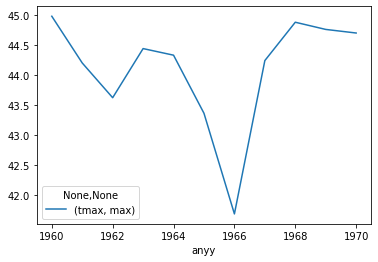

In [45]:
# •Que criterio utilizarías para decidir cual es el año más frío ?

df10 = df[df.anyy.between(1960,1970)]
df10 = df10.groupby(['anyy']).agg({'tmax':['max']})
df10.plot()
df10